Proportional gain amplifies the “present” (current time-step) error, with no consideration of past or future errors.

In [1]:
## open_controller.py
##################################################################################
# This will be our control class that over the course of the next lessons will 
# become more advance!
##################################################################################

# Create an Open_Controller class!
class Open_Controller:
    # Define the class initalization sequence! 
    def __init__(self, start_time = 0):
        
        # Create a class variable to store the start time!
        self.start_time_ = start_time
        
        # Create a class variable to store the control effort!
        self.u = 0
        
        # Create a class variable to store the last timestamp!
        self.last_timestamp_ = 0
        
        # Create a class variable to store our set point!
        self.set_point_ = 0
        
        # Create a class variable to all applied control efforts!
        self.effort_applied = []

    # Set the altitude set point
    def setTarget(self, target):
        self.set_point_ = float(target)
     
    # Set the desired control effort   
    def setControlEffort(self, control_effort):
        self.u = float(control_effort)

    # Retrive the current control effort
    def getControlEffort(self,time):
        # Store the last time stamp!
        self.last_timestamp_ = time
        
        # Store control effort applied!
        self.effort_applied.append(self.u)
        
        return self.u

In [2]:
#quad1d_eom.py
import numpy as np
import matplotlib.pyplot as plt
# from open_controller import Open_Controller

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
# This file represents the dynamical equations of motion for the 1D quadrotor
##################################################################################

def ydot(y, t, controller):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - controller.last_timestamp_
    # Control effort
    u = controller.getControlEffort(t)

    ### State derivatives
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]


Bad key "text.kerning_factor" on line 4 in
C:\Users\Dell\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


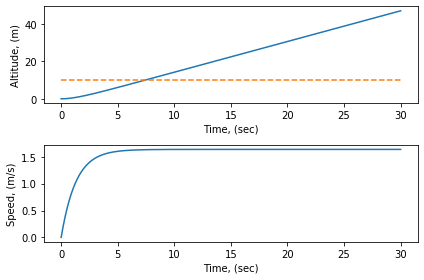

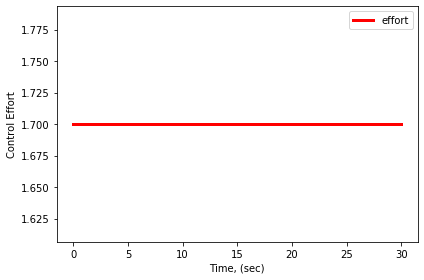

The rise time is 7.455 seconds
The percent overshoot is 369.7%
The offset from the target at 30 seconds is 36.974 meters


In [3]:
## hover_plot.py
import numpy as np
import matplotlib.pyplot as plt
# from open_controller import Open_Controller
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# Here we are going to apply a continuous and constant control effort with a value 
# of 1.7!
control_effort = 1.7
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simulation points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of Open_Controller class
controller = Open_Controller()

# Set our contstant control effort
controller.setControlEffort(control_effort)

# Set altitude target
r = 10 # meters
controller.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,controller)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
# Plot 1: This is the altitude of our quad copter as a function of time!
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

# Plot 2: This is the speed of our quad copter as a function of time!
ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

# Plot 3: This is the control effort applied to our quad copter as a function of time!
fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, controller.effort_applied, label='effort', linewidth=3, color = 'red')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The offset from the target at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))

In [ ]:
##################################################################################
# Your goal is to follow the comments and complete the the tasks asked of you.
# Take this time to try and understand the workings of the empty class structure.
# The following quizzes will assume a understanding of a working class strucutre.
#
# Good luck designing your proportional controller!
#
##################################################################################

class P_Controller:
    def __init__(self, kp = 0.0, start_time = 0):
        
        # The P controller can be initalized with a specific kp value
        self.kp_ = float(kp)
        
        # Create internal class variables for 
        # set_point_ and set it to 0.0, and start_time_
        # and set it to the start_time variable.
        ########################################


        ########################################

        # Store last timestamp
        self.last_timestamp_ = 0.0

        # Control effort history
        self.u_p = [0]

    # Set the altitude set point
    def setTarget(self, target):
        self.set_point_ = float(target)

    def setKP(self, kp):
        # Set the internal kp_ value with the provided variable
        # See setTarget if you are confused on how to do so
        ########################################

        ########################################

    def update(self, measured_value, timestamp):
        # Calculate delta_time using the last_timestamp_
        # and the provided timestamp argument
        ########################################

        ########################################
        
        if delta_time == 0:
            # Delta time is zero
            return 0
        
        # Calculate the error as the differnce between
        # the set_point_ and the measured_value
        ########################################

        ########################################
        
        # Set the last_timestamp_ to current timestamp
        ########################################

        ########################################

        # Calculate the proportional error here. Be sure to access the 
        # the internal Kp class variable
        ########################################
        p = None
        ########################################

        # Set the control effort
        # u is the sum of all your errors. In this case it is just 
        # the proportional error.
        ########################################
        u = None
        ########################################
        
        # Here we are storing the control effort history for post control
        # observations. 
        self.u_p.append(p)

        return u

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from p_controller import P_Controller

##################################################################################
## DO NOT MODIFY ANY PORTION OF THIS FILE
# This file represents the dynamical equations of motion for the 1D quadrotor
##################################################################################

def ydot(y, t, p):
    ''' Returns the state vector at the next time-step

    Parameters:
    ----------
    y(k) = state vector, a length 2 list
      = [altitude, speed]
    t = time, (sec)
    pid = instance of the PIDController class

    Returns
    -------
    y(k+1) = [y[0], y[1]] = y(k) + ydot*dt
    '''

    # Model state
    y0 = y[0] # altitude, (m)
    y1 = y[1] # speed, (m/s)


    # Model parameters
    g = -9.81 # gravity, m/s/s
    m =  1.54 # quadrotor mass, kg
    c =  10.0 # electro-mechanical transmission constant

    # time step, (sec)
    dt = t - p.last_timestamp_
    # Control effort
    u = p.update(y0,t)

    ### State derivatives
    # if altitude = 0
    if (y0 <= 0.):
        # if control input, u <= gravity, vehicle stays at rest on the ground
        # this prevents quadrotor from "falling" through the ground when thrust is
        # too small.
        if u <= np.absolute(g*m/c):
            y0dot = 0.
            y1dot = 0.
        else:  # else if u > gravity and quadrotor accelerates upwards
            y0dot = y1
            y1dot = g + c/m*u - 0.75*y1
    else: # otherwise quadrotor is already in the air
        y0dot = y1
        y1dot = g + c/m*u - 0.75*y1

    y0 += y0dot*dt
    y1 += y1dot*dt
    return [y0, y1]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
##################################################################################
##################################################################################
# from p_controller import P_Controller

##################################################################################
##################################################################################
# from quad1d_eom import ydot

##################################################################################
##################################################################################
# This code is what will be executed and what will produce your results
# For this quiz you need to set kp below to your desired value
# Then modify p_controller.py to build out your P controller
kp = 0.76
# Note that kp needs to be set to 0.76 in order to pass the project
# You are encouraged to change Kp in order to observe the effects
# What happens when Kp is really small?
# What happens when Kp is really large?
# Do we notice anything relating Kp and the control effort?
# Observe the steady state offset and the percent overshoot!
##################################################################################
##################################################################################

# Simulation parameters
N = 500 # number of simultion points
t0 = 0  # starting time, (sec)
tf = 30 # end time, (sec)
time = np.linspace(t0, tf, N)
dt = time[1] - time[0] # delta t, (sec)

##################################################################################
# Core simulation code
# Inital conditions (i.e., initial state vector)
y = [0, 0]
   #y[0] = initial altitude, (m)
   #y[1] = initial speed, (m/s)

# Initialize array to store values
soln = np.zeros((len(time),len(y)))

# Create instance of P_Controller class
p = P_Controller()

# Set the Kp value of the controller
p.setKP(kp)

# Set altitude target
r = 10 # meters
p.setTarget(r)

# Simulate quadrotor motion
j = 0 # dummy counter
for t in time:
    # Evaluate state at next time point
    y = ydot(y,t,p)
    # Store results
    soln[j,:] = y
    j += 1

##################################################################################
# Plot results
SP = np.ones_like(time)*r # altitude set point
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(time, soln[:,0],time,SP,'--')
ax1.set_xlabel('Time, (sec)')
ax1.set_ylabel('Altitude, (m)')

ax2 = fig.add_subplot(212)
ax2.plot(time, soln[:,1])
ax2.set_xlabel('Time, (sec)')
ax2.set_ylabel('Speed, (m/s)')
plt.tight_layout()
plt.show()

fig2 = plt.figure()
ax3 = fig2.add_subplot(111)
ax3.plot(time, p.u_p, label='u_p', linewidth=3, color = 'red')
ax3.set_xlabel('Time, (sec)')
ax3.set_ylabel('Control Effort')
h, l = ax3.get_legend_handles_labels()
ax3.legend(h, l)
plt.tight_layout()
plt.show()
##################
y0 = soln[:,0] #altitude
rise_time_index =  np.argmax(y0>r)
RT = time[rise_time_index]
print("The rise time is {0:.3f} seconds".format(RT))

OS = (np.max(y0) - r)/r*100
if OS < 0:
    OS = 0
print("The percent overshoot is {0:.1f}%".format(OS))

print ("The steady state offset at 30 seconds is {0:.3f} meters".format(abs(soln[-1,0]-r)))